In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [17]:
state = 'CT'
ct_excel = pd.read_excel(r"C:\Users\david\OneDrive\Documents\GitHub\SPEOC-pt-1\Data\Post1790\CT\CT_post1790_CD_ledger.xlsx",
                             header=13, usecols='K, L, N, O, AD, AE, AT, AU') 
print(ct_excel)

     State Occupation  Dollar  Cents  Dollar.1  Cents.1  Dollar.2  Cents.2
0       CT   Merchant  1064.0   75.0     532.0     37.0     508.0     51.0
1       CT     Farmer   449.0   96.0     224.0     97.0     232.0     10.0
2       RI     Farmer   154.0   20.0      77.0     10.0     192.0      NaN
3       CT   Merchant   196.0   75.0      98.0     37.0     172.0     24.0
4       CT   Merchant    53.0   58.0      26.0     79.0      67.0      6.0
...    ...        ...     ...    ...       ...      ...       ...      ...
1002   NaN        NaN     NaN    NaN       NaN      NaN      46.0     30.0
1003   NaN        NaN     NaN    NaN       NaN      NaN       NaN      2.0
1004    CT        NaN   237.0   87.0     277.0     64.0     166.0     54.0
1005    CT    Esquire   196.0   63.0      98.0     31.0     223.0     92.0
1006    CT    Esquire   249.0   90.0     124.0     95.0     144.0      0.0

[1007 rows x 8 columns]


In [18]:
ct_excel = ct_excel[ct_excel['State'].str.contains(state) == True].drop('State', axis=1)
print(ct_excel)

     Occupation  Dollar  Cents  Dollar.1  Cents.1  Dollar.2  Cents.2
0      Merchant  1064.0   75.0     532.0     37.0     508.0     51.0
1        Farmer   449.0   96.0     224.0     97.0     232.0     10.0
3      Merchant   196.0   75.0      98.0     37.0     172.0     24.0
4      Merchant    53.0   58.0      26.0     79.0      67.0      6.0
5           NaN   345.0   50.0     172.0     75.0     248.0     76.0
...         ...     ...    ...       ...      ...       ...      ...
946      Farmer    51.0   36.0      25.0     68.0      36.0     97.0
948         NaN    60.0   23.0      30.0     62.0       NaN      NaN
1004        NaN   237.0   87.0     277.0     64.0     166.0     54.0
1005    Esquire   196.0   63.0      98.0     31.0     223.0     92.0
1006    Esquire   249.0   90.0     124.0     95.0     144.0      0.0

[885 rows x 7 columns]


In [19]:
def get_debt_no_job(occupations):
    no_occ = occupations[occupations['Occupation'].isna()] #query all people listed who have debt but no occupation listed
    no_occ_copy = no_occ.copy() #avoid settingcopywarning warning
    no_occ_copy[['Cents', 'Cents.1', 'Cents.2']] = no_occ_copy[['Cents', 'Cents.1', 'Cents.2']].div(100) #divide cents column by 100
    total = no_occ_copy[['Dollar', 'Dollar.1', 'Dollar.2', 'Cents', 'Cents.1', 'Cents.2']].sum(axis=1) #find total with dollar and cents separate columns    

    return total.to_frame(name='totals') #convert to more usable dataframe format

In [20]:
def get_debt_w_job(occupations):
    occ = occupations[occupations['Occupation'].notna()] #query all people listed who have debt with an occupation listed
    occ_copy = occ.copy() #avoid settingcopywarning warning
    occ_copy[['Cents', 'Cents.1', 'Cents.2']] = occ_copy[['Cents', 'Cents.1', 'Cents.2']].div(100) #divide cents column by 100
    total = occ_copy[['Dollar', 'Dollar.1', 'Dollar.2', 'Cents', 'Cents.1', 'Cents.2']].sum(axis=1) #find total with dollar and cents separate columns       
    
    return total.to_frame(name='totals.2') #convert to more usable dataframe format 

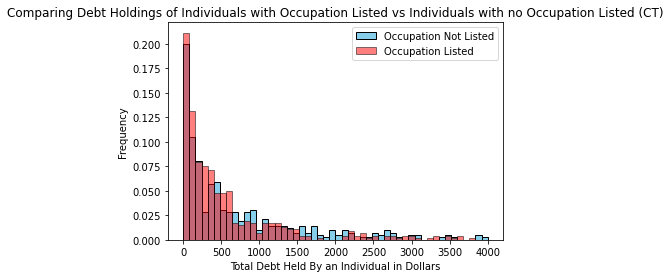

In [21]:
def plot(excel):
    no_occ = get_debt_no_job(excel)['totals'].reset_index(drop=True) #get dataframe for people with no occupation listed
    occ = get_debt_w_job(excel)['totals.2'].reset_index(drop=True) #get dataframe for people with an occupation listed
    
    NoOccExcel = pd.read_excel('NoOccupation.xlsx')
    OccExcel = pd.read_excel('Occupation.xlsx')
    
    ConcatDfNoOcc = pd.concat([NoOccExcel, no_occ], ignore_index=True, axis=1)
    ConcatDfOcc = pd.concat([OccExcel, occ], ignore_index=True, axis=1)
    
    ConcatDfNoOcc.to_excel('NoOccupation.xlsx', index=False)
    ConcatDfOcc.to_excel('Occupation.xlsx', index=False)
    
    plt.hist(no_occ, color='skyblue', edgecolor='black', range=[0,4000], bins=50, label='Occupation Not Listed', weights=np.ones_like(no_occ) / len(no_occ)) #plot
    plt.hist(occ, color='red', edgecolor='black', range=[0,4000], bins=50, alpha=0.5, label='Occupation Listed', weights=np.ones_like(occ) / len(occ)) #plot
    title = "Comparing Debt Holdings of Individuals with Occupation Listed vs Individuals with no Occupation Listed (" + state + ")"
    plt.title(title) #add title
    plt.xlabel("Total Debt Held By an Individual in Dollars") #add x title
    plt.ylabel("Frequency") #add y title
    plt.legend() #add legend
    
plot(ct_excel)

In [22]:
def calculate_ks():
    rng = np.random.default_rng() 
    n1 = len(get_debt_no_job(ct_excel))
    n2 = len(get_debt_w_job(ct_excel))
    
    rvs1 = stats.norm.rvs(size=n1, loc=0., scale=1, random_state=rng)
    rvs2 = stats.norm.rvs(size=n2, loc=0.5, scale=1.5, random_state=rng)
    return stats.ks_2samp(rvs1, rvs2)
    
calculate_ks()

KstestResult(statistic=0.2611956343680891, pvalue=9.314771176605063e-14)